In [81]:
import matplotlib.pyplot as plt #plotting
import numpy as np
import os #to access directory
from tqdm import tqdm #counting files

import seaborn as sns #visual beautification
import cv2
import io #input/ouput from local
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle #shuffles matrics randomly with continuation of same pattern
from tensorflow.keras.preprocessing.image import ImageDataGenerator #augmentation, annotation
from tensorflow.keras.applications import EfficientNetB7 #B0-B7

#EarlyStopping: to avoid overfitting
#ReduceLROnplateau: Reduce Learning Rate based on weight
#TensorBoard: Visualization toolkit of tensorflow
#ModelCheckpoint: save the model or weight at every epoch for improve performance and avoid repeat

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.utils import to_categorical #encoding

#result checking
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from warnings import filterwarnings #ignore deprecation
from PIL import Image #pillow for image open, rotate and display

import ipywidgets as widgets  #for button
from IPython.display import display, clear_output 

**To see all files one by one and findout unnecessary/hidden/corrupted file, name mismatch**

In [ ]:
#os.listddir = to show all directory
#os.walk = to show each files with dir
#os.path.join=merge the paths
for dir_name, _, filenames in os.walk("../input/alzheimersdisease5classdatasetadni"):
    for filename in filenames:
        print(os.path.join(dir_name, filename))
    

In [83]:
#labels based on classwise folder name in directory
labels=["Final AD JPEG", "Final CN JPEG", "Final EMCI JPEG", "Final LMCI JPEG", "Final MCI JPEG"]

**Prepare train test Data Together**

In [115]:
X_train=[]
y_train=[]

image_size=162
for i in labels:
    folderDirectory = os.path.join("../input/alzheimersdisease5classdatasetadni/Alzheimers-ADNI", "train", i) #tagging labels by i
    for j in tqdm(os.listdir(folderDirectory)): #tqdm counting
        image=cv2.imread(os.path.join(folderDirectory, j)) #image to array
        image=cv2.resize(image, (image_size, image_size))
        
        X_train.append(image)
        y_train.append(i)
for i in labels:
    folderDirectory=os.path.join("../input/alzheimersdisease5classdatasetadni/Alzheimers-ADNI","test", i)
    for j in tqdm(os.listdir(folderDirectory)):
        image=cv2.imread(os.path.join(folderDirectory, j))
        image=cv2.resize(image, (image_size,image_size))
        
        X_train.append(image)
        y_train.append(i)
#now we need to convert it to numpy array to make it workable
X_train=np.array(X_train)
y_train = np.array(y_train)
   
    

100%|██████████| 35/35 [00:00<00:00, 430.49it/s]


In [116]:
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)


X_train Shape: (1296, 162, 162, 3)
y_train Shape: (1296,)


**Count unique value for each class**

In [117]:
_,y_trainImageInfo= np.unique(y_train, return_counts =True)
print("Final AD JPEG:")
print("counts:", y_trainImageInfo[0])
print("Final CN JPEG:")
print("counts:", y_trainImageInfo[1])
print("Final EMCI JPEG:")
print("counts:", y_trainImageInfo[2])
print("Final LMCI JPEG:")
print("counts:", y_trainImageInfo[3])
print("Final MCI JPEG:")
print("counts:", y_trainImageInfo[4])

Final AD JPEG:
counts: 171
Final CN JPEG:
counts: 580
Final EMCI JPEG:
counts: 240
Final LMCI JPEG:
counts: 72
Final MCI JPEG:
counts: 233


In [118]:
#shuffle based on randomState
X_train, y_train = shuffle(X_train, y_train, random_state=101)

In [119]:
print("Shape of X_train:",'\n',X_train.shape)
print("Shape of y_train:",'\n',y_train.shape)

Shape of X_train: 
 (1296, 162, 162, 3)
Shape of y_train: 
 (1296,)


In [120]:
print(y_train[0])
print(y_train[100])
print(y_train[200])
print(y_train[500])
print(y_train[750])
print(y_train[1000])
print(y_train[1295])

Final EMCI JPEG
Final CN JPEG
Final EMCI JPEG
Final MCI JPEG
Final EMCI JPEG
Final CN JPEG
Final LMCI JPEG


**Train and Test Split**

In [121]:
X_train, X_test, y_train, y_test =train_test_split(X_train, y_train, test_size=0.10, random_state=101)

In [122]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (1166, 162, 162, 3)
X_test: (130, 162, 162, 3)
y_train: (1166,)
y_test: (130,)


In [123]:
print("y_train Index 0:", y_train[0])
print("y_test Index 0:", y_test[0])

y_train Index 0: Final EMCI JPEG
y_test Index 0: Final EMCI JPEG


**Categorical/label/one hot encoding**

In [124]:
y_train_new=[]
y_test_new=[]

for i in y_train:
    y_train_new.append(labels.index(i)) #indexing value of y_train
y_train = y_train_new
y_train = to_categorical(y_train)

for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = to_categorical(y_test)

In [125]:
print("shape of y_train", y_train.shape)
print("array of y_test", y_test.shape)
print("array of y_train", y_train)




shape of y_train (1166, 5)
array of y_test (130, 5)
array of y_train [[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


**max value in array for respective image class**

In [126]:
#maxma value of that array of respective image
print(np.argmax(y_train[0]))
print(np.argmax(y_train[200]))
print(np.argmax(y_train[450]))

2
0
2


In [127]:
efficient = EfficientNetB7(weights ="imagenet", include_top=False, input_shape=(image_size, image_size, 3))


In [128]:
import tensorflow as tf

In [130]:
#pooling can be avg or max
#dropout range 0.3 -0.5 which means 30-50% neurons will be dropped to avoid overfitting
model=efficient.output
model=tf.keras.layers.GlobalMaxPooling2D()(model)
model=tf.keras.layers.Dropout(0.5)(model)
model=tf.keras.layers.Dense(5, activation="softmax")(model)
model=tf.keras.models.Model(inputs=efficient.input, outputs=model)

In [131]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 162, 162, 3) 0                                            
__________________________________________________________________________________________________
rescaling_5 (Rescaling)         (None, 162, 162, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
normalization_5 (Normalization) (None, 162, 162, 3)  7           rescaling_5[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 163, 163, 3)  0           normalization_5[0][0]            
____________________________________________________________________________________________

In [132]:
#loss for categorical value, adam perform best
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics =["accuracy"])

In [133]:
#.h5 = Hierarchical Data Format Ver. 5 file, verbose =1, to see execution
tensorboard= TensorBoard(log_dir="logs")
checkpoint= ModelCheckpoint("efficient.h5",
                           monitor="val_accuracy", verbose=1,
                           mode="auto", save_best_only=True)
#monitor: quantity to be monitored.     
#factor: factor by which the learning rate will be reduced. 
#patience: number of epochs with no improvement after which learning rate will be reduced.     
#verbose: int. 0: quiet, 1: update messages.
#min_delta: early stopping of epochs
reduce_lr=ReduceLROnPlateau(monitor="val_accuracy",
                           factor=0.5,
                           patience=3,verbose=1,
                           mode="auto", min_delta=0.001)

                               

2022-09-05 17:43:48.662890: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-05 17:43:48.662975: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-09-05 17:43:48.850983: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-05 17:43:48.851168: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


**Fit the model**

In [134]:
history = model.fit(X_train, y_train,
                   validation_split=0.1,
                   epochs=15, verbose=1,
                   batch_size=32,
                   callbacks =[tensorboard, checkpoint, reduce_lr])

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/15


2022-09-05 17:44:23.969520: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.58GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-09-05 17:44:23.979522: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-09-05 17:44:23.985563: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.71GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


 1/33 [..............................] - ETA: 14:48 - loss: 4.3245 - accuracy: 0.2500

2022-09-05 17:44:26.420903: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-05 17:44:26.420962: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/33 [>.............................] - ETA: 1:09 - loss: 4.3250 - accuracy: 0.3125 

2022-09-05 17:44:30.029017: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-05 17:44:30.045449: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-09-05 17:44:30.260141: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 7220 callback api events and 7217 activity events. 
2022-09-05 17:44:30.443733: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-05 17:44:30.674257: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_09_05_17_44_30

2022-09-05 17:44:30.809580: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_09_05_17_44_30/e3c6bfab8315.trace.json.gz
2022-09-05 17:44:31.090430: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/pl

32/33 [============================>.] - ETA: 0s - loss: 2.7931 - accuracy: 0.3389

2022-09-05 17:44:52.978369: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.31GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


33/33 [==============================] - 62s 1s/step - loss: 2.7624 - accuracy: 0.3384 - val_loss: 2.3007 - val_accuracy: 0.3419

Epoch 00001: val_accuracy improved from -inf to 0.34188, saving model to efficient.h5
Epoch 2/15
33/33 [==============================] - 24s 726ms/step - loss: 1.3490 - accuracy: 0.4662 - val_loss: 1.7133 - val_accuracy: 0.4359

Epoch 00002: val_accuracy improved from 0.34188 to 0.43590, saving model to efficient.h5
Epoch 3/15
33/33 [==============================] - 24s 726ms/step - loss: 1.1682 - accuracy: 0.5405 - val_loss: 1.6075 - val_accuracy: 0.4274

Epoch 00003: val_accuracy did not improve from 0.43590
Epoch 4/15
33/33 [==============================] - 24s 729ms/step - loss: 0.9404 - accuracy: 0.6625 - val_loss: 1.9913 - val_accuracy: 0.4444

Epoch 00004: val_accuracy improved from 0.43590 to 0.44444, saving model to efficient.h5
Epoch 5/15
33/33 [==============================] - 24s 733ms/step - loss: 0.8130 - accuracy: 0.7102 - val_loss: 2.4435

In [135]:
def accuracy_loss_plot (history):
    fig = plt.figure(figsize=(10,10))
    
    plt.subplot(221)
    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(222)
    plt.plot(history.history["loss"], "bo--", label="loss")
    plt.plot(history.history["val_loss"], "ro--", label = "val_loss")
    plt.title("Training Data Loss")
    plt.xlabel("Number of epochs")
    plt.ylabel("loss")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

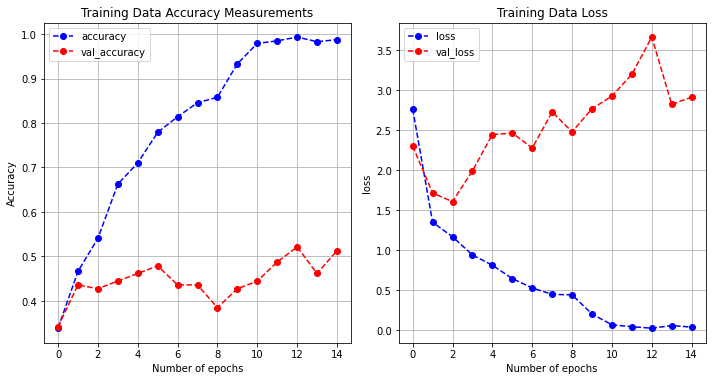

In [136]:
accuracy_loss_plot(history)

In [137]:
X_testloss=model.evaluate(X_test, y_test, verbose=1)

5/5 [==============================] - 1s 172ms/step - loss: 3.6005 - accuracy: 0.4846


In [138]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_new = np.argmax(y_test, axis=1)

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.31      0.34        16
           1       0.51      0.85      0.64        59
           2       0.20      0.04      0.06        26
           3       0.50      0.20      0.29         5
           4       0.50      0.25      0.33        24

    accuracy                           0.48       130
   macro avg       0.42      0.33      0.33       130
weighted avg       0.43      0.48      0.42       130



<AxesSubplot:>

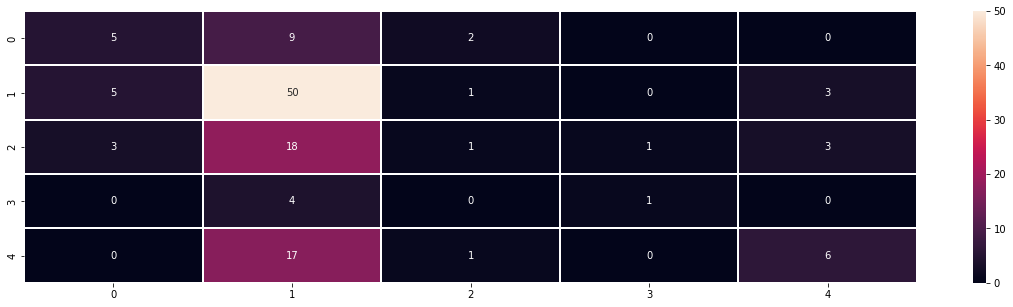

In [140]:
cm=confusion_matrix(y_test_new, y_pred)
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(cm, annot=True, linewidths=2, ax=ax)

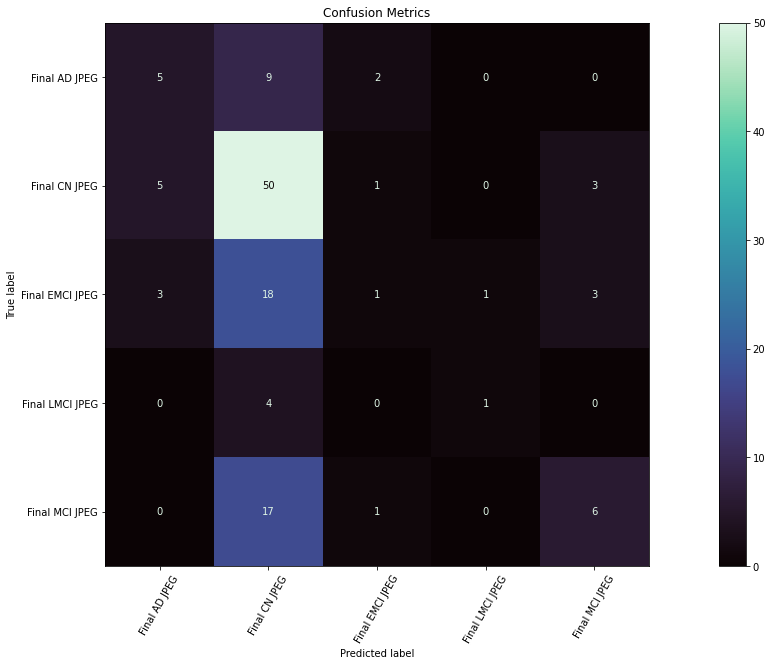

In [141]:
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(25,10)) 
display_c_m.plot(cmap='mako',ax=ax,xticks_rotation=60)
plt.title("Confusion Metrics")
plt.show()

In [142]:
def imagePrediction(upload):
    for name, fileinfo  in uploader.value.items():
        image = Image.open(io.BytesIO(fileinfo['content'])) #Image for PIL and io=input/output locall
    
    images = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    images = cv2.resize(images,(162, 162))
    images = images.reshape(1, 162, 162, 3)
    prd = model.predict(images)
    prd = np.argmax(prd, axis = 1)[0]
    
    if prd==0:
        prd="Final AD JPEG"
    elif prd==1:
        prd="Final CN JPEG"
    elif prd==2:
        prd="Final EMCI JPEG"
    elif prd==3:
        prd="Final LMCI JPEG"
    elif prd==4:
        prd="Final MCI JPEG"
    
    if prd!=1:
        print(f"Model Predict That is a {prd}")
        

**To upload files/images**

In [143]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

**Image Predition for Alzheimers**

In [112]:
button=widgets.Button(description="Predict")
out=widgets.Output()

def on_button_click(_): 
    with out:
        clear_output()
        try: 
            imagePrediction(uploader)
        except:
            print("Enter the correct image file")
button.on_click(on_button_click)
widgets.VBox([button, out])
            